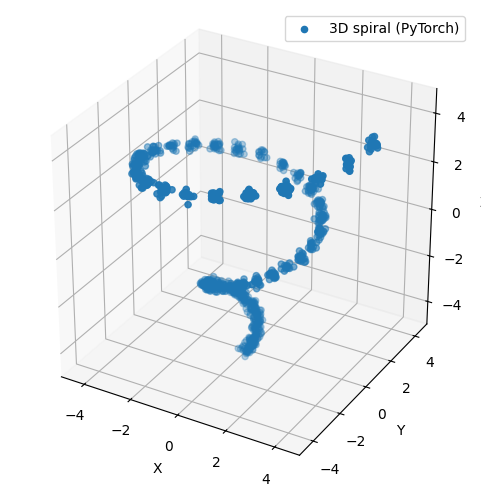

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from diffusion_laboratory.sde import StochasticDifferentialEquation
from diffusion_laboratory.linalg import ScalarLinearOperator

from diffusion_laboratory.sde import ScalarSDE

import matplotlib.animation as animation
import distributions
import matplotlib.pyplot as plt
# Create the 3D point distribution instance
    
keyword="spiral"
if keyword == "saddle":
    dist = distributions.Saddle_Distribution(bandwidth=0.1)
elif keyword== "spiral":
    dist = distributions.Spiral_Distribution(bandwidth=0.1)

n=1000
# Sample 1000 points
samples= dist.sample(n)

# plot the samples
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Initial scatter plot (3D points)
scatter = ax.scatter(samples[:n, 0], samples[:n, 1], samples[:n, 2], label=f"3D {keyword} (PyTorch)")

# Add labels
plt.legend(loc="upper right")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)


plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f"{keyword}_distribution.png")

Sampling step 1/99
Sampling step 2/99
Sampling step 3/99
Sampling step 4/99
Sampling step 5/99
Sampling step 6/99
Sampling step 7/99
Sampling step 8/99
Sampling step 9/99
Sampling step 10/99
Sampling step 11/99
Sampling step 12/99
Sampling step 13/99
Sampling step 14/99
Sampling step 15/99
Sampling step 16/99
Sampling step 17/99
Sampling step 18/99
Sampling step 19/99
Sampling step 20/99
Sampling step 21/99
Sampling step 22/99
Sampling step 23/99
Sampling step 24/99
Sampling step 25/99
Sampling step 26/99
Sampling step 27/99
Sampling step 28/99
Sampling step 29/99
Sampling step 30/99
Sampling step 31/99
Sampling step 32/99
Sampling step 33/99
Sampling step 34/99
Sampling step 35/99
Sampling step 36/99
Sampling step 37/99
Sampling step 38/99
Sampling step 39/99
Sampling step 40/99
Sampling step 41/99
Sampling step 42/99
Sampling step 43/99
Sampling step 44/99
Sampling step 45/99
Sampling step 46/99
Sampling step 47/99
Sampling step 48/99
Sampling step 49/99
Sampling step 50/99
Sampling 

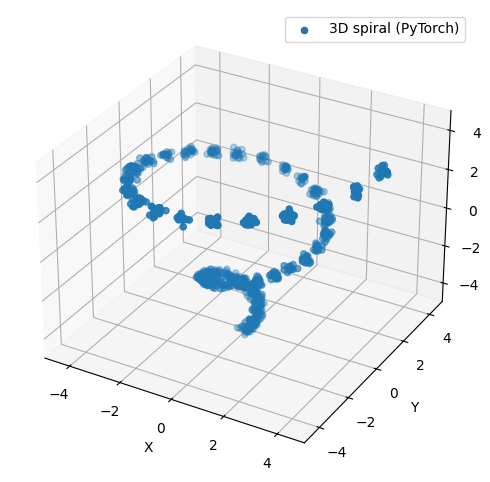

In [3]:
step_size=0.5

def f(x, t): 
    return 0.5*step_size*step_size*dist.score(x)

def G(x, t): 
    return ScalarLinearOperator(step_size)

    
langevin_dynamics_SDE = StochasticDifferentialEquation(f=f, G=G)

timesteps = torch.linspace(0.0, 1.0, 100)
xt = langevin_dynamics_SDE.sample(samples, timesteps, sampler='euler', return_all=True, verbose=True)

print (len(xt))

# plot the samples
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Initial scatter plot (3D points)
scatter = ax.scatter(xt[0][:n, 0], xt[0][:n, 1], xt[0][:n, 2], label=f"3D {keyword} (PyTorch)")

# Add labels
plt.legend(loc="upper right")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
# Update function for animation (for scatter points)
def update(frame):
    ax.clear()  # Clear the previous frame

    # Update scatter plot with new data
    scatter = ax.scatter(xt[frame][:n, 0], xt[frame][:n, 1], xt[frame][:n, 2], label=f"3D {keyword} (PyTorch)")
    
    # Add axis labels and legend back
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    plt.legend(loc="upper right")
    
    print(f"Animated Frame: {frame}")
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), blit=False)

# Save the animation using ffmpeg
writer = animation.FFMpegWriter(fps=10, bitrate=5000, extra_args=['-pix_fmt', 'yuv420p', '-crf', '15'])
ani.save(f'{keyword}_langevin_dynamics.mp4', writer=writer, dpi=150)

print("Done!")

Sampling step 1/99
Sampling step 2/99
Sampling step 3/99
Sampling step 4/99
Sampling step 5/99
Sampling step 6/99
Sampling step 7/99
Sampling step 8/99
Sampling step 9/99
Sampling step 10/99
Sampling step 11/99
Sampling step 12/99
Sampling step 13/99
Sampling step 14/99
Sampling step 15/99
Sampling step 16/99
Sampling step 17/99
Sampling step 18/99
Sampling step 19/99
Sampling step 20/99
Sampling step 21/99
Sampling step 22/99
Sampling step 23/99
Sampling step 24/99
Sampling step 25/99
Sampling step 26/99
Sampling step 27/99
Sampling step 28/99
Sampling step 29/99
Sampling step 30/99
Sampling step 31/99
Sampling step 32/99
Sampling step 33/99
Sampling step 34/99
Sampling step 35/99
Sampling step 36/99
Sampling step 37/99
Sampling step 38/99
Sampling step 39/99
Sampling step 40/99
Sampling step 41/99
Sampling step 42/99
Sampling step 43/99
Sampling step 44/99
Sampling step 45/99
Sampling step 46/99
Sampling step 47/99
Sampling step 48/99
Sampling step 49/99
Sampling step 50/99
Sampling 

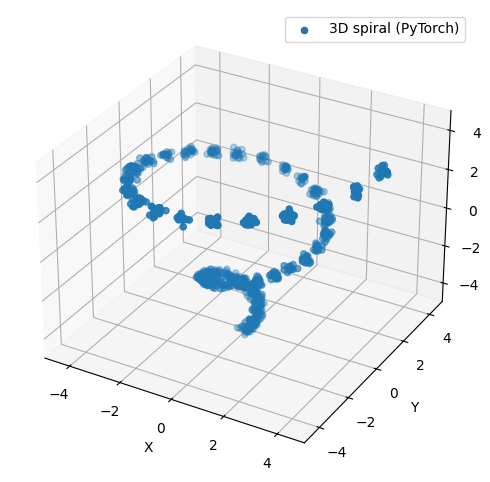

In [4]:
beta = torch.tensor(3.0)
signal_scale = lambda t: torch.exp(-0.5*beta*t)
noise_variance = lambda t: (1 - torch.exp(-beta*t))
signal_scale_prime = lambda t: -0.5*beta*torch.exp(-0.5*beta*t)
noise_variance_prime = lambda t: beta*torch.exp(-beta*t)

forward_diffusion_SDE = ScalarSDE(  signal_scale=signal_scale,
                                    noise_variance=noise_variance,
                                    signal_scale_prime=signal_scale_prime,
                                    noise_variance_prime=noise_variance_prime)

timesteps = torch.linspace(0.0, 1.0, 100)
xt = forward_diffusion_SDE.sample(samples, timesteps, sampler='euler', return_all=True, verbose=True)


# plot the samples
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Initial scatter plot (3D points)
scatter = ax.scatter(xt[0][:n, 0], xt[0][:n, 1], xt[0][:n, 2], label=f"3D {keyword} (PyTorch)")

# Add labels
plt.legend(loc="upper right")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,10)
# Update function for animation (for scatter points)
def update(frame):
    ax.clear()  # Clear the previous frame

    # Update scatter plot with new data
    scatter = ax.scatter(xt[frame][:n, 0], xt[frame][:n, 1], xt[frame][:n, 2], label=f"3D {keyword} (PyTorch)")
    
    # Add axis labels and legend back
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    plt.legend(loc="upper right")
    
    print(f"Animated Frame: {frame}")
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), blit=False)

# Save the animation using ffmpeg
writer = animation.FFMpegWriter(fps=25, bitrate=5000, extra_args=['-pix_fmt', 'yuv420p', '-crf', '15'])
ani.save(f'{keyword}_forward_dynamics.mp4', writer=writer, dpi=150)

print("Done!")


In [5]:
    
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
timesteps = torch.linspace(0.0, 1.0, 100)

# Define the score estimator network (3 -> 2 dense NN)
class Denoiser(nn.Module):
    def __init__(self):
        super(Denoiser, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(4, 64), nn.LayerNorm(64),nn.SiLU(),
            nn.Linear(64, 128),nn.LayerNorm(128),nn.SiLU(),
            nn.Linear(128, 64),nn.LayerNorm(64),nn.SiLU(),
            nn.Linear(64, 3)  # Output 2D score estimate
        )
    
    def forward(self, x, t):
        # Concatenate 2D position and time
        input = torch.cat([x, t], dim=1)
        out=x+self.fc(input)
        return out
    

# Instantiate the score estimator
denoiser = Denoiser().to(device)


In [6]:
# Adam optimizer
optimizer = optim.Adam(denoiser.parameters(), lr=1e-3)

T = 0.5
# Training loop for score matching
def train_score_estimator(forward_sde, score_estimator, num_epochs=3000, batch_size=100):
    
    for epoch in range(num_epochs):
        # Sample 1000 points
        x0 =dist.sample(batch_size).to(device)  # Sample from the distribution
        t = T*torch.rand(batch_size, 1).to(device)  # Uniformly sample t from [0, 1)
        t = t**2.0 # square it to emphasize early time points

        # Get x_t given x_0 from the forward SDE
        xt = forward_sde.sample_x_t_given_x_0(x0, t)
        
        # Compute the score estimate
        x0_est = score_estimator(xt, t)

        # Score matching loss (MSE between estimated and true score)
        loss = ((x0_est - x0) ** 2).mean()
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}")

    # save the trained score estimator
    torch.save(denoiser.state_dict(), f'denoiser_{keyword}.pth')
    
# Train the score estimator
train_score_estimator(forward_diffusion_SDE, denoiser)



Epoch [0/3000], Loss: 0.3797944188117981
Epoch [100/3000], Loss: 0.23662346601486206
Epoch [200/3000], Loss: 0.17260876297950745
Epoch [300/3000], Loss: 0.14715580642223358
Epoch [400/3000], Loss: 0.14019761979579926
Epoch [500/3000], Loss: 0.11884302645921707
Epoch [600/3000], Loss: 0.14592227339744568
Epoch [700/3000], Loss: 0.10686298459768295
Epoch [800/3000], Loss: 0.1054774820804596
Epoch [900/3000], Loss: 0.1337149441242218
Epoch [1000/3000], Loss: 0.09583944827318192
Epoch [1100/3000], Loss: 0.151137575507164
Epoch [1200/3000], Loss: 0.10656276345252991
Epoch [1300/3000], Loss: 0.0939965471625328
Epoch [1400/3000], Loss: 0.11160045862197876
Epoch [1500/3000], Loss: 0.09557672590017319
Epoch [1600/3000], Loss: 0.09759766608476639
Epoch [1700/3000], Loss: 0.14329107105731964
Epoch [1800/3000], Loss: 0.10386810451745987
Epoch [1900/3000], Loss: 0.0823974758386612
Epoch [2000/3000], Loss: 0.10779904574155807
Epoch [2100/3000], Loss: 0.14209343492984772
Epoch [2200/3000], Loss: 0.09

/var/folders/_3/l_pbw9lj6ylfhwzbl_3yk83c0000gn/T/ipykernel_21646/284925477.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  denoiser.load_state_dict(torch.load(f'denoise

/var/folders/_3/l_pbw9lj6ylfhwzbl_3yk83c0000gn/T/ipykernel_21220/2061450052.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  denoiser.load_state_dict(torch.load('denoiser

Sampling step 1/299
Sampling step 2/299
Sampling step 3/299
Sampling step 4/299
Sampling step 5/299
Sampling step 6/299
Sampling step 7/299
Sampling step 8/299
Sampling step 9/299
Sampling step 10/299
Sampling step 11/299
Sampling step 12/299
Sampling step 13/299
Sampling step 14/299
Sampling step 15/299
Sampling step 16/299
Sampling step 17/299
Sampling step 18/299
Sampling step 19/299
Sampling step 20/299
Sampling step 21/299
Sampling step 22/299
Sampling step 23/299
Sampling step 24/299
Sampling step 25/299
Sampling step 26/299
Sampling step 27/299
Sampling step 28/299
Sampling step 29/299
Sampling step 30/299
Sampling step 31/299
Sampling step 32/299
Sampling step 33/299
Sampling step 34/299
Sampling step 35/299
Sampling step 36/299
Sampling step 37/299
Sampling step 38/299
Sampling step 39/299
Sampling step 40/299
Sampling step 41/299
Sampling step 42/299
Sampling step 43/299
Sampling step 44/299
Sampling step 45/299
Sampling step 46/299
Sampling step 47/299
Sampling step 48/299
S

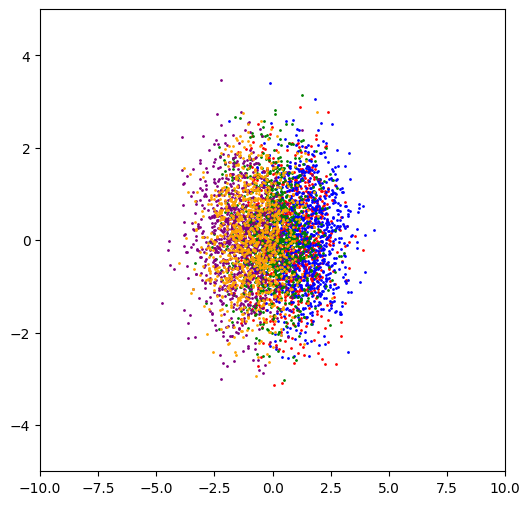

In [11]:
def score_estimator(x, t):
    x0_pred = denoiser(x, t)
    Sigma = forward_diffusion_SDE.Sigma(t)
    Sigma.scalar += 1e-8  # Add small constant to avoid division by zero
    mu = forward_diffusion_SDE.H(t) @ x0_pred
    return -1.0 * (Sigma.inverse_LinearOperator() @ (x - mu))


# Get the reverse SDE using the trained score estimator
reverse_diffusion_SDE = forward_diffusion_SDE.reverse_SDE_given_score_estimator(score_estimator)

# Start from the last step of forward 
xT=xt[-1].to(device)

# or purely new Gaussian
# xT = torch.randn(1000, 3).to(device)

# or repeat the forward again
# x0 = dist.sample(1000)
# xT = forward_diffusion_SDE.sample_x_t_given_x_0(x0, torch.tensor(1.0).to(device))

# Sample points using the reverse SDE
reverse_steps=100
reverse_timesteps = torch.linspace(T, 0.0, reverse_steps).to(device)
denoiser.eval()
xt_reverse = reverse_diffusion_SDE.sample(xT, reverse_timesteps, sampler='euler', return_all=True, verbose=True)


# plot the samples
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Initial scatter plot (3D points)
scatter = ax.scatter(xt_reverse[0][:n, 0], xt_reverse[0][:n, 1], xt_reverse[0][:n, 2], label="3D Spiral (PyTorch)")

# Add labels
plt.legend(loc="upper right")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
# Update function for animation (for scatter points)
def update(frame):
    ax.clear()  # Clear the previous frame

    # Update scatter plot with new data
    scatter = ax.scatter(xt_reverse[frame][:n, 0].detach(), 
                            xt_reverse[frame][:n, 1].detach(), 
                            xt_reverse[frame][:n, 2].detach(), label=f"3D {keyword} (PyTorch)")
    
    # Add axis labels and legend back
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    plt.legend(loc="upper right")
    
    print(f"Animated Frame: {frame}")
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), blit=False)

# Save the animation using ffmpeg
writer = animation.FFMpegWriter(fps=10, bitrate=5000, extra_args=['-pix_fmt', 'yuv420p', '-crf', '15'])
ani.save(f'{keyword}_reverse_dynamics.mp4', writer=writer, dpi=300)

print("Done!")


    